In [234]:
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from dataclasses import dataclass
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [235]:
from google.colab import files
uploaded=files.upload()

Saving Dry_Bean_Dataset.xlsx to Dry_Bean_Dataset (3).xlsx


In [236]:
df_or=pd.read_excel("Dry_Bean_Dataset.xlsx")
df=df_or.copy()

In [237]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


### **EDA**

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

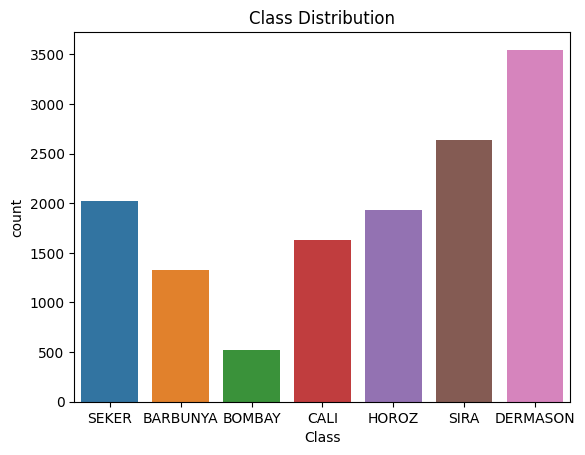

------------------------------------------------------------------


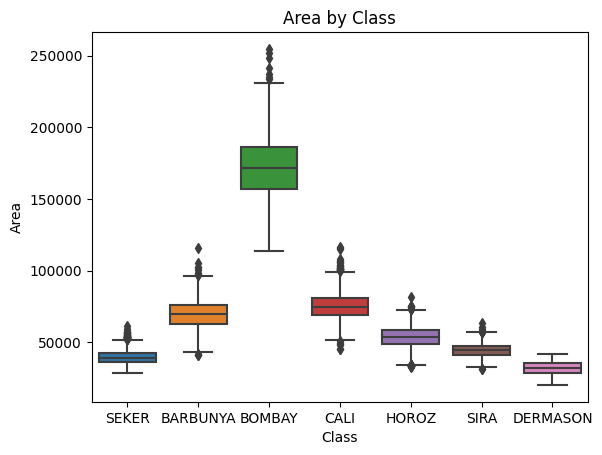

------------------------------------------------------------------


<ipython-input-238-2ffcd687755e>:50: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


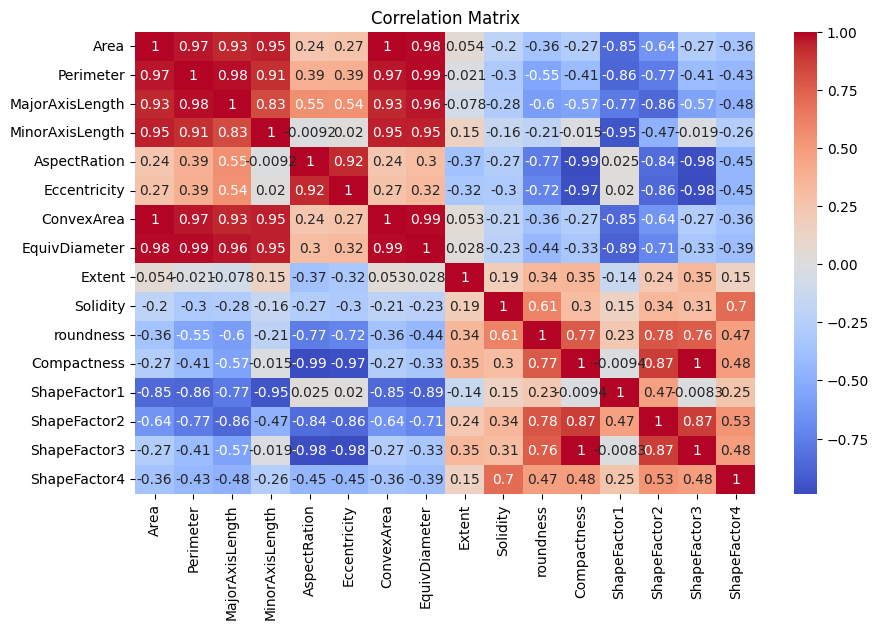

------------------------------------------------------------------


In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_excel("/content/Dry_Bean_Dataset.xlsx")

# Display the first few records
print(df.head())

print("------------------------------------------------------------------")

# Check the dimensions of the dataset
print("Shape:", df.shape)
print("------------------------------------------------------------------")


# Get column descriptions
print(df.describe())
print("------------------------------------------------------------------")


# Check for missing values
print("Missing values:\n", df.isnull().sum())
print("------------------------------------------------------------------")


# Class distribution
class_counts = df['Class'].value_counts()
print("Class distribution:\n", class_counts)
print("------------------------------------------------------------------")


# Data visualization - example plots
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()
print("------------------------------------------------------------------")


sns.boxplot(x='Class', y='Area', data=df)
plt.title("Area by Class")
plt.show()
print("------------------------------------------------------------------")


# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation Matrix")
plt.show()
print("------------------------------------------------------------------")





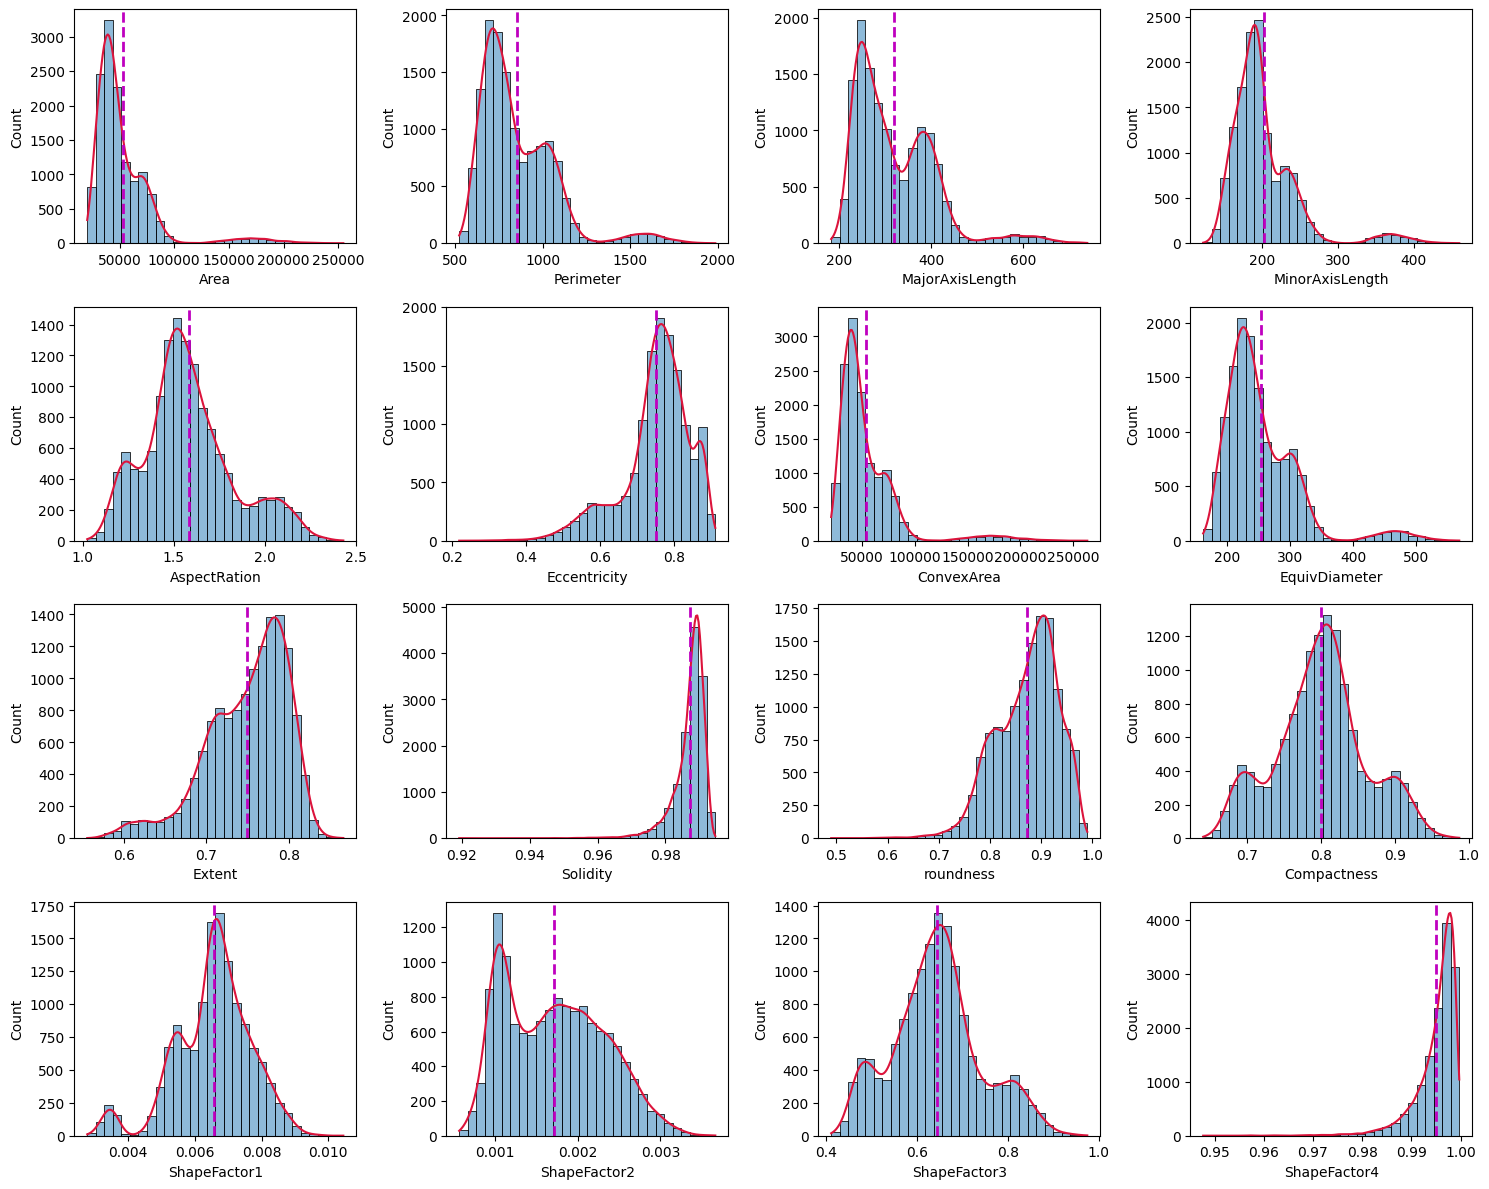

In [239]:
#Parametric distribution
df1=df.copy()
Numeric_cols = df1.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(df[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()
#Data is skewed

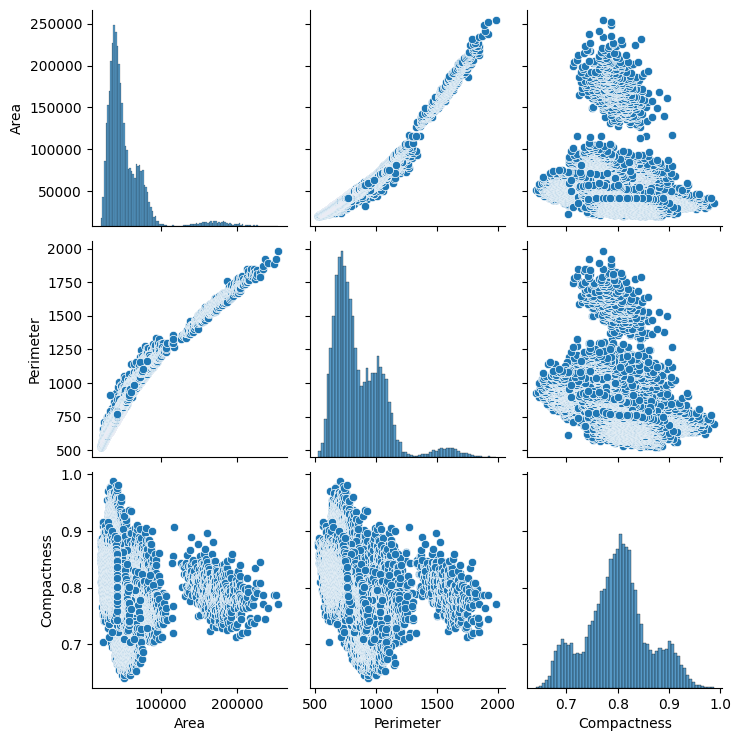

In [240]:
# Select a subset of variables for the pair plot
variables = ['Area', 'Perimeter', 'Compactness']

# Create the pair plot
sns.pairplot(df[variables])
plt.show()

### **NAIVE**

In [241]:
df=df_or.copy()

In [242]:
df.corr()

<ipython-input-242-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


In [243]:
class GaussianNaiveBayes:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def splitData(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,
                                                            test_size = 0.3,
                                                            random_state =1)
        return X_train, X_test, y_train, y_test

    def distribution(self, data):
        mean = np.mean(data)
        std = np.std(data)
        dist = norm(mean, std)
        return dist

    #def probability(self, x, prior, dist1, dist2):
        #return prior * dist1.pdf(x[0]) * dist2.pdf(x[1])

    def probability(self, x, prior, c):
        self.t = prior
        for i in range(self.X_train.shape[1]): # for attributes
            exec(f'self.t = self.t * self.dist_X{c}{i}.pdf(x[{i}])')
        return self.t

    def evaluate(self, y, y2):
        y = y.reshape(-1)
        y2 = y2.reshape(-1)
        y = (y==1)
        y2 = (y2 == 1)
        r =  (y & y2).sum()
        r2 =  y.sum()
        recall = r/r2
        p = (y & y2).sum()
        p2 = y2.sum()
        precision = p/p2
        f =  (precision*recall)
        f2 = (precision+recall)
        fscore = 2*f/f2

    def fit(self):
        self.X_train, self.X_test, self.y_train, self.y_test = self.splitData()

        # seperate data by class
        for x in range(len(np.unique(self.y_train))):
            exec(f'self.X_train{x} = self.X_train[self.y_train == {x}]')

        for x in range(len(np.unique(self.y_train))):
            exec(f'self.prior{x} = len(self.X_train{x})/len(self.X_train)')
            #self.prior1 = len(X1_train)/len(self.X_train)

        for j in range(len(np.unique(self.y_train))): # for class
            for x in range(self.X_train.shape[1]): # for attributes
                exec(f'self.dist_X{j}{x} = self.distribution(self.X_train{j}[{x}])')


    def predict(self):
        y_pred = []
        for sample, target in zip(self.X_test, self.y_test):  # iterate over 2 list with same indices
            prob = []
            for x in range(len(np.unique(self.y_train))):
                exec(f'py{x} = self.probability(sample, self.prior{x}, x)')
                #exec(f'print("Probability for belonging to class", x ,"is", py{x})')
                exec(f'prob.append(py{x})')
            #print("The model predicted class {} and the actual class is {}".format(np.argmax(prob), target))
            y_pred.append(np.argmax(prob))

        print(confusion_matrix(self.y_test, y_pred))
        acc = np.trace(confusion_matrix(self.y_test, y_pred))/ np.sum(confusion_matrix(self.y_test, y_pred))
        print("Accuracy score is:", acc)

In [244]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
classes = np.unique(y)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
gnb = GaussianNaiveBayes(X, y)
gnb.fit()
gnb.predict()

[[162   0 200   0  25   0   3]
 [  0 153   0   0   0   0   0]
 [128   0 350   0   1   0   0]
 [  0   0   0 592   0   0 470]
 [280   0   5   0 212   0  82]
 [  9   0   0  21  57   0 534]
 [ 14   0   0   1 280   0 505]]
Accuracy score is: 0.48334965719882467


### Naive + Dropping columns that are highly correlated

In [245]:
df=df_or.copy()

In [246]:
df = df.drop(columns=['Eccentricity', 'Compactness', 'AspectRation', 'MajorAxisLength', 'Perimeter', 'Area', 'ConvexArea'])

In [247]:
df.corr()

<ipython-input-247-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MinorAxisLength,EquivDiameter,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
MinorAxisLength,1.000000,0.948539,0.145957,-0.155831,-0.210344,-0.947204,-0.471347,-0.019326,-0.263749
EquivDiameter,0.948539,1.000000,0.028383,-0.231648,-0.435945,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.145957,0.028383,1.000000,0.191389,0.344411,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.155831,-0.231648,0.191389,1.000000,0.607150,0.153388,0.343559,0.307662,0.702163
roundness,-0.210344,-0.435945,0.344411,0.607150,1.000000,0.230273,0.782824,0.763126,0.472149
ShapeFactor1,-0.947204,-0.892741,-0.141616,0.153388,0.230273,1.000000,0.469197,-0.008320,0.248619
ShapeFactor2,-0.471347,-0.713069,0.237956,0.343559,0.782824,0.469197,1.000000,0.872971,0.529932
ShapeFactor3,-0.019326,-0.330389,0.347624,0.307662,0.763126,-0.008320,0.872971,1.000000,0.484274
ShapeFactor4,-0.263749,-0.392512,0.148502,0.702163,0.472149,0.248619,0.529932,0.484274,1.000000


In [248]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
classes = np.unique(y)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
gnb = GaussianNaiveBayes(X, y)
gnb.fit()
gnb.predict()

[[ 327    0    0    1    0   62    0]
 [  69   84    0    0    0    0    0]
 [ 452    0    0    0    0   27    0]
 [   0    0    0 1039    0   23    0]
 [  11    0    0   72    0  496    0]
 [   7    0    0  224    0  235  155]
 [   0    0    0  196    0  604    0]]
Accuracy score is: 0.41258570029382957


###PCA + Naive


In [249]:
df=df_or.copy()

In [250]:
import pandas as pd
import numpy as np

df2 = df.iloc[:, :-1]
cov = df2.cov()
z = []
z2 = []
df_new = pd.DataFrame()

eigenvalues, eigenvectors = np.linalg.eig(cov)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

selected_eigenvalues = sorted_eigenvalues[:]
selected_eigenvectors = sorted_eigenvectors[:, :]

numofcolumn = 16  # Specify the number of columns desired (e.g., 3)
pca_columns = []

for i in range(numofcolumn):
    eigenvec = selected_eigenvectors[:, i]
    z = []
    for df_row in df2.values:
        t = 0
        for ev_element, df_element in zip(eigenvec, df_row):
            t += ev_element * df_element
        z.append(t)
    column_name = f'Pca{i+1}'
    pca_columns.append(column_name)
    df_new[column_name] = z


In [251]:
X = df_new.iloc[:,:].values
y = df.iloc[:, -1].values
classes = np.unique(y)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
gnb = GaussianNaiveBayes(X, y)
gnb.fit()
gnb.predict()

[[313   0   0   0  58   0  19]
 [ 16 137   0   0   0   0   0]
 [456   0   0   0  23   0   0]
 [  0   0   0 194   0 589 279]
 [106   0   0   0 248   6 219]
 [  0   0   0   0  15  99 507]
 [  0   0   0   0  47  17 736]]
Accuracy score is: 0.42286973555337903


### PCA + dropping + Naive

In [252]:
df=df_or.copy()

In [253]:
df.corr()

<ipython-input-253-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


In [254]:
df = df.drop(columns=['Eccentricity', 'Compactness', 'AspectRation', 'MajorAxisLength', 'Perimeter', 'Area', 'ConvexArea'])

In [255]:
import pandas as pd
import numpy as np

df2 = df.iloc[:, :-1]
cov = df2.cov()
z = []
z2 = []
df_new = pd.DataFrame()

eigenvalues, eigenvectors = np.linalg.eig(cov)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

selected_eigenvalues = sorted_eigenvalues[:]
selected_eigenvectors = sorted_eigenvectors[:, :]

numofcolumn = 9  # Specify the number of columns desired (e.g., 3)
pca_columns = []

for i in range(numofcolumn):
    eigenvec = selected_eigenvectors[:, i]
    z = []
    for df_row in df2.values:
        t = 0
        for ev_element, df_element in zip(eigenvec, df_row):
            t += ev_element * df_element
        z.append(t)
    column_name = f'Pca{i+1}'
    pca_columns.append(column_name)
    df_new[column_name] = z


In [256]:
X = df_new.iloc[:,:].values
y = df.iloc[:, -1].values
classes = np.unique(y)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
gnb = GaussianNaiveBayes(X, y)
gnb.fit()
gnb.predict()

[[341   0   0   0   0   0  49]
 [152   1   0   0   0   0   0]
 [461   0   0   0   0   0  18]
 [  0   0   0 391   0   0 671]
 [ 62   0   0   0   0   0 517]
 [  8   0   0   0   0   0 613]
 [  0   0   0   0   0   0 800]]
Accuracy score is: 0.3753672869735553


### **LOGISTIC**

In [257]:
df=df_or.copy()

In [258]:
class LogisticRegression:

    def __init__(self, learningrate, epsilon, maxiteration, lamda = 0, removeindex = []) -> None:
        self.epsilon = epsilon
        self.learningrate = learningrate
        self.maxiteration = maxiteration
        self.removeindex = removeindex
        self.lamda = lamda
        self.X = X
        self.y = y

    def addX0(self, X):
        return np.column_stack([np.ones(X.shape[0]), X])

  #Reading the dataset and splitting to test and train
    def readdataset(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size = 0.3,
                                                            random_state =1, stratify = y)
        X_train, mean, std = self.normalizeTrain(X_train)
        X_test = self.normalizeTest(X_test, mean, std)
        return X_train, X_test, y_train, y_test

#This function is normalize the train data and add the ones after normalizing
    def normalizeTrain(self, X):
        mean = np.mean(X, axis = 0)
        std = np.std(X, axis = 0)
        X_norm = (X - mean)/ std
        X_norm = self.addX0(X_norm)
        return X_norm, mean, std
#This function normalize the test data using the mean and std of training data
    def normalizeTest(self, X, mean, std):
        X_norm = (X - mean)/ std
        X_norm = self.addX0(X_norm)
        return X_norm

  #finding sigmoid
    def sigmoid(self, z):
        sd = 1 / (1 + np.exp(-z))
        return sd

  #function to define sigmoid with theta value
    def predict(self, X):
        sig = self.softmax(X.dot(self.w))
        #sig = np.around(sig)
        return sig

    def softmax(self, z):
        softmx = np.exp(z)
        return softmx

  #function to find cost function
    def costfunction(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        c = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
        cost = -c/X.shape[0]
        return cost

  #derivative of cost function
    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        sig = sig-y
        gradient = sig.dot(X) + self.lamda * self.w
        return gradient

  #Gradient Descent Solution
    def gradientdescent(self, X, y):
        errors = []
        last_error = float('inf')
        for i in range(self.maxiteration):
            self.w = self.w - self.learningrate * self.gradient(X, y)
            current_error = self.costfunction(X, y)
            diff = last_error - current_error
            last_error = current_error
            errors.append(current_error)

            if np.abs(diff) < self.epsilon:
                #print('model stoppedddddd')
                break
        return

  # finding f1score, recall and precision
    def evaluate(self, y, y2):
        y = y.reshape(-1)
        y2 = y2.reshape(-1)
        y = (y==1)
        y2 = (y2 == 1)
        r =  (y & y2).sum()
        r2 =  y.sum()
        recall = r/r2
        p = (y & y2).sum()
        p2 = y2.sum()
        precision = p/p2
        f =  (precision*recall)
        f2 = (precision+recall)
        fscore = 2*f/f2
        return fscore, recall, precision

  #Fit Function to Run the model
    def fit(self):

        X_train, X_test, y_train, y_test = self.readdataset(self.X, y)

        actual_class_test = []
        for i in range(y_test.shape[0]):
            actual_class_test.append(np.argmax(y_test[i])+1)

        actual_class_train = []
        for i in range(y_train.shape[0]):
            actual_class_train.append(np.argmax(y_train[i])+1)

        for i in range(7):
            y_train_new = y_train[:, i]
            y_test_new = y_test[:, i]


            self.w = np.ones(X_train.shape[1], dtype=np.float64)
            self.gradientdescent(X_train, y_train_new)
            exec(f'self.W{i+1} = self.w')
            exec(f'self.y_hat_test{i+1} = self.predict(X_test)')
            exec(f'self.y_hat_train{i+1} = self.predict(X_train)')


        prob_test = np.stack((self.y_hat_test1, self.y_hat_test2, self.y_hat_test3, self.y_hat_test4, self.y_hat_test5,
                        self.y_hat_test6, self.y_hat_test7), axis = -1)

        prob_train = np.stack((self.y_hat_train1, self.y_hat_train2, self.y_hat_train3, self.y_hat_train4, self.y_hat_train5,
                        self.y_hat_train6, self.y_hat_train7), axis = -1)

        pred_class_test = []
        for i in range(prob_test.shape[0]):
            pred_class_test.append(np.argmax(prob_test[i])+1)

        pred_class_train = []
        for i in range(prob_train.shape[0]):
            pred_class_train.append(np.argmax(prob_train[i])+1)

        acc_test = np.trace(confusion_matrix(np.array(actual_class_test), np.array(pred_class_test)))/ np.sum(confusion_matrix(np.array(actual_class_test), np.array(pred_class_test)))
        self.acc_test = acc_test
        print("Test Accuracy:", acc_test)
        Error_test = 1- acc_test
        print("Error_test : " , Error_test)


        acc_train = np.trace(confusion_matrix(np.array(actual_class_train), np.array(pred_class_train)))/ np.sum(confusion_matrix(np.array(actual_class_train), np.array(pred_class_train)))
        print("Train_Accuracy:", acc_train)
        Error_train = 1- acc_train
        print("Error_train: " , Error_train)
        Total_Error_train_test = Error_test + Error_train
        self.Total_Error_train_test = Total_Error_train_test
        print("Total Error: ", Total_Error_train_test)


In [259]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
classes = np.unique(y)
l = preprocessing.LabelEncoder()
y = l.fit_transform(y)
y = y.reshape(-1, 1)
le = OneHotEncoder(sparse= False)
y = le.fit_transform(y)
y = y.astype(int)
model = LogisticRegression(learningrate=0.01, epsilon=0.00005, lamda=0, maxiteration=500)
model.fit()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-258-9ec2c2a0db0d>:55: RuntimeWarning: divide by zero encountered in log
  c = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
<ipython-input-258-9ec2c2a0db0d>:55: RuntimeWarning: invalid value encountered in multiply
  c = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
<ipython-input-258-9ec2c2a0db0d>:39: RuntimeWarning: overflow encountered in exp
  sd = 1 / (1 + np.exp(-z))


Test Accuracy: 0.8993633692458374
Error_test :  0.10063663075416263
Train_Accuracy: 0.9030124908155768
Error_train:  0.09698750918442323
Total Error:  0.19762413993858585


### **Biased Variance Tradeoff**

## Since learning rate is a hyperparameter.We are choosing the optimum learning rate based on Biased Variance Tradeoff

for i 1e-05
Test Accuracy: 0.8765915768854065
Error_test :  0.12340842311459355
Train_Accuracy: 0.8789755431930303
Error_train:  0.12102445680696972
Total Error:  0.24443287992156326
for i 3e-05
Test Accuracy: 0.8961802154750245
Error_test :  0.10381978452497553
Train_Accuracy: 0.9040621391833735
Error_train:  0.09593786081662647
Total Error:  0.199757645341602
for i 5e-05
Test Accuracy: 0.9005876591576886
Error_test :  0.09941234084231143
Train_Accuracy: 0.9076309436338826
Error_train:  0.09236905636611736
Total Error:  0.1917813972084288
for i 0.0001
Test Accuracy: 0.9045053868756121
Error_test :  0.0954946131243879
Train_Accuracy: 0.9104649942269339
Error_train:  0.08953500577306606
Total Error:  0.18502961889745395
for i 0.0003
Test Accuracy: 0.9037708129285015
Error_test :  0.09622918707149852
Train_Accuracy: 0.9104649942269339
Error_train:  0.08953500577306606
Total Error:  0.18576419284456458
for i 0.0004


<ipython-input-258-9ec2c2a0db0d>:55: RuntimeWarning: divide by zero encountered in log
  c = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
<ipython-input-258-9ec2c2a0db0d>:55: RuntimeWarning: invalid value encountered in multiply
  c = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()


Test Accuracy: 0.905484818805093
Error_test :  0.09451518119490698
Train_Accuracy: 0.9122493964521885
Error_train:  0.0877506035478115
Total Error:  0.18226578474271848
for i 0.0005


<ipython-input-258-9ec2c2a0db0d>:55: RuntimeWarning: divide by zero encountered in log
  c = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
<ipython-input-258-9ec2c2a0db0d>:55: RuntimeWarning: invalid value encountered in multiply
  c = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()


Test Accuracy: 0.8947110675808031
Error_test :  0.1052889324191969
Train_Accuracy: 0.8999685105489661
Error_train:  0.1000314894510339
Total Error:  0.2053204218702308
for i 0.001


<ipython-input-258-9ec2c2a0db0d>:55: RuntimeWarning: divide by zero encountered in log
  c = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
<ipython-input-258-9ec2c2a0db0d>:55: RuntimeWarning: invalid value encountered in multiply
  c = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()


Test Accuracy: 0.8797747306562194
Error_test :  0.12022526934378064
Train_Accuracy: 0.8877925894825234
Error_train:  0.11220741051747662
Total Error:  0.23243267986125726


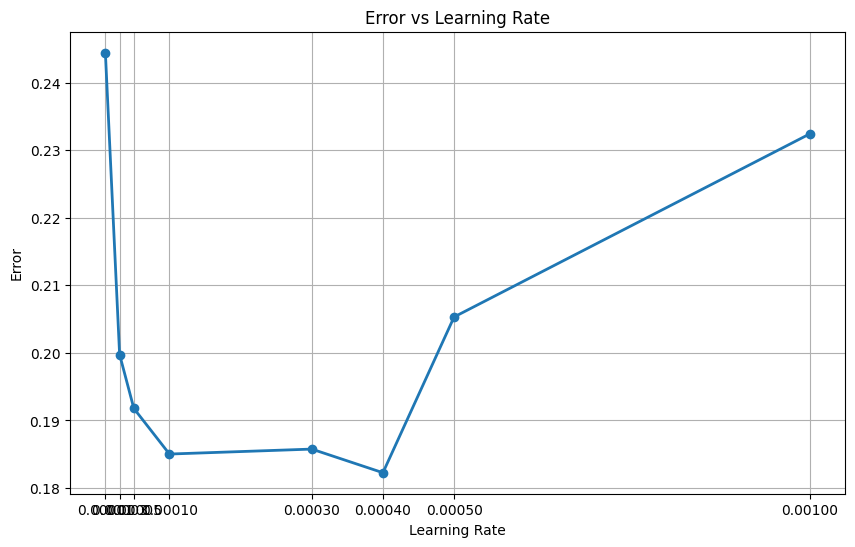

In [260]:
l = [0.00001, 0.00003, 0.00005, 0.0001, 0.0003, 0.0004, 0.0005, 0.001]

Errorss = []

for i in l:
    print("for i", i)
    model = LogisticRegression(learningrate=i, epsilon=0.00005, lamda=10, maxiteration=500)
    model.fit()
    Errorss.append(model.Total_Error_train_test)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(l, Errorss, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Learning Rate')
plt.ylabel('Error')
plt.title('Error vs Learning Rate')
plt.xticks(l)  # Set x-axis ticks to match the learning rates
plt.grid(True)  # Add grid lines for better readability
plt.show()


We can see for 0.0004 has the minimum error  

In [261]:
model = LogisticRegression(learningrate=0.0004, epsilon=0.00005, lamda=0, maxiteration=500)
model.fit()

<ipython-input-258-9ec2c2a0db0d>:55: RuntimeWarning: divide by zero encountered in log
  c = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
<ipython-input-258-9ec2c2a0db0d>:55: RuntimeWarning: invalid value encountered in multiply
  c = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()


Test Accuracy: 0.9071988246816847
Error_test :  0.09280117531831533
Train_Accuracy: 0.9145586228613415
Error_train:  0.08544137713865851
Total Error:  0.17824255245697385


### **QDA**

In [262]:
df=df_or.copy()

In [263]:
grouped_data = df.groupby('Class')

cov_matrices = {}
for group_name, group_data in grouped_data:
    class_cov = group_data.cov()
    cov_matrices[group_name] = class_cov

for class_name, cov_matrix in cov_matrices.items():
    print("Covariance matrix for class:", class_name)
    print(cov_matrix.to_string())
    print()

Covariance matrix for class: BARBUNYA
                         Area      Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  Eccentricity    ConvexArea  EquivDiameter        Extent      Solidity     roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4
Area             1.053782e+08  856615.574198    291322.919268    175812.842555     92.891787  3.395204e+01  1.071814e+08  225474.675899  8.884175e+00  9.352470e-01 -9.770052e+01   -24.621211 -3.930820e+00 -1.203750e+00    -39.565897 -1.989981e+00
Perimeter        8.566156e+05    8033.473531      2521.038953      1341.061380      1.944005  7.327545e-01  8.781569e+05    1838.102057 -2.276331e-01 -8.681820e-02 -2.330897e+00    -0.518341 -3.014658e-02 -1.151369e-02     -0.836419 -2.999872e-02
MajorAxisLength  2.913229e+05    2521.038953      1040.888925       336.002644      2.172493  8.369991e-01  2.963475e+05     625.811561 -1.334114e-01  1.726296e-03 -4.859497e-01    -0.575367 -7.681218e-03 -6.007956e-03   

<ipython-input-263-eccfbb108ffe>:5: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  class_cov = group_data.cov()


In [264]:
class QDA:

    def __init__(self):
        self.X = None
        self.y = None
        self.classes = []
        self.class_priors = {}
        self.class_means = {}
        self.class_cov_matrices = {}

    def split_data(self):
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=0.3, shuffle=True, random_state=24
        )
        return X_train, X_test, y_train, y_test

    def mean_func(self, X):
        columns = X.shape[1]
        mean = np.zeros(columns)
        for i in range(columns):
            mean[i] = np.sum(X[:, i]) / X.shape[0]
        return mean

    def covariance_func(self, X):
        rows = X.shape[0]
        x_mean = self.mean_func(X)
        cov = X - x_mean
        cov_mat = np.dot(cov.T, cov) / (rows - 1)
        return cov_mat

    def prior(self, y, cls):
        return np.sum(np.equal(y, cls)) / len(y)

    def likelihood(self, x, mean_x, covar_matrix):
        diff = x - mean_x
        cov_inv = np.linalg.inv(covar_matrix)
        det = np.linalg.det(covar_matrix)
        exponent = -0.5 * np.dot(np.dot(diff, cov_inv), diff.T)
        likelihood = np.exp(exponent) / np.sqrt((2 * np.pi) ** len(x) * det)
        return likelihood

    def posterior(self, x, cls):
        prior = self.prior(self.y_train, cls)
        mean_p = self.class_means[cls]
        covariance_matrix = self.class_cov_matrices[cls]
        likelihood = self.likelihood(x, mean_p, covariance_matrix)
        posterior = likelihood * prior
        return posterior

    def predict(self, X):
        y_pred = []
        for x in X:
            max_posterior = None
            max_cls = None
            for cls in self.classes:
                posterior = self.posterior(x, cls)
                if max_posterior is None or posterior > max_posterior:
                    max_posterior = posterior
                    max_cls = cls
            y_pred.append(max_cls)
        return y_pred

    def efficacy_report(self, y, y_hat):
        y_hat = y_hat == 1
        y = y == 1
        tp = np.logical_and(y_hat, y).sum()
        recall = tp / y.sum()
        precision = tp / y_hat.sum()
        f1_score = 2 * (recall * precision) / (recall + precision)
        return recall, precision, f1_score

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = self.split_data()
        self.classes = np.unique(self.y_train)
        for cls in self.classes:
            X_cls = self.X_train[self.y_train == cls]
            self.class_priors[cls] = self.prior(self.y_train, cls)
            self.class_means[cls] = self.mean_func(X_cls)
            self.class_cov_matrices[cls] = self.covariance_func(X_cls)
        y_hat_test = self.predict(self.X_test)
        #print(y_hat_test)
        test_accuracy = np.mean(y_hat_test == self.y_test)
        print("Test_Accuracy", test_accuracy)

        y_hat_train = self.predict(self.X_train)
        train_accuracy = np.mean(y_hat_train == self.y_train)
        print("Train_Accuracy", train_accuracy)
        print(confusion_matrix(self.y_test, y_hat_test))


In [265]:
X = df.drop('Class', axis=1).values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Class'])
y = y_encoded
model = QDA()
model.X = X
model.y = y_encoded
model.fit(X, y)

Test_Accuracy 0.9076885406464251
Train_Accuracy 0.9155033063923586
[[355   0  38   0   3   4   9]
 [  0 129   0   0   0   0   0]
 [ 10   0 455   0   9   1   0]
 [  1   0   0 931   4  30 130]
 [  0   0  11   7 550   0  14]
 [  6   0   0   7   0 587  24]
 [  3   0   4  33  18  11 700]]
